In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
hdfc = pd.read_csv('HDFCBANK.csv')
pvr = pd.read_csv('PVR.csv')
tata_motors = pd.read_csv('TATAMOTORS.csv')

hdfc.name = 'HDFC'
pvr.name = 'PVR'
tata_motors.name = 'Tata Motors'

stocks = [hdfc, pvr, tata_motors]

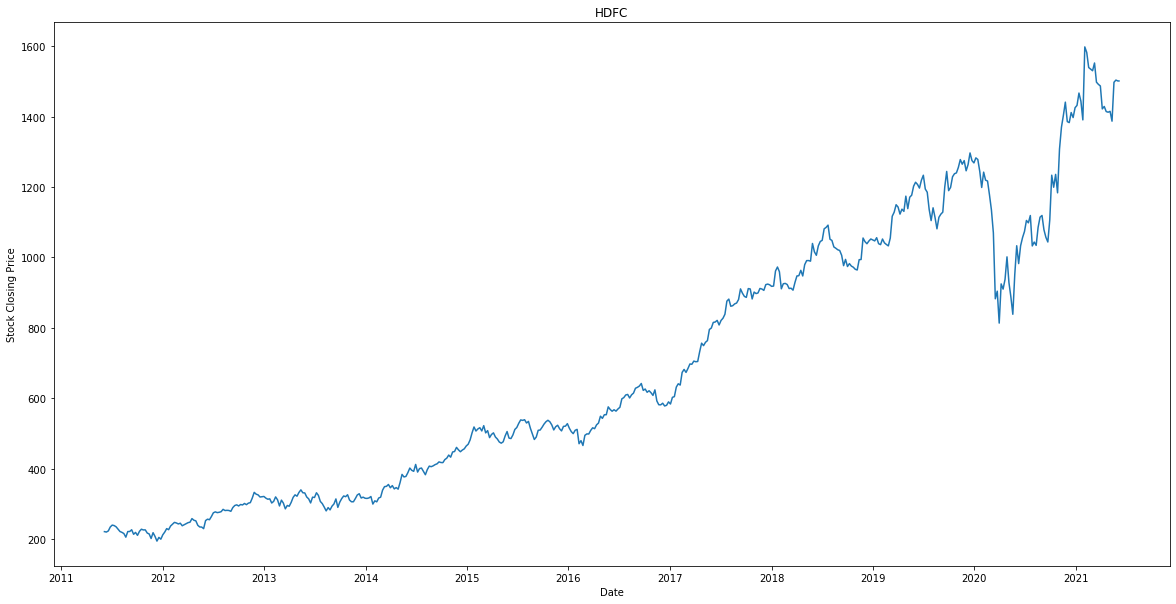

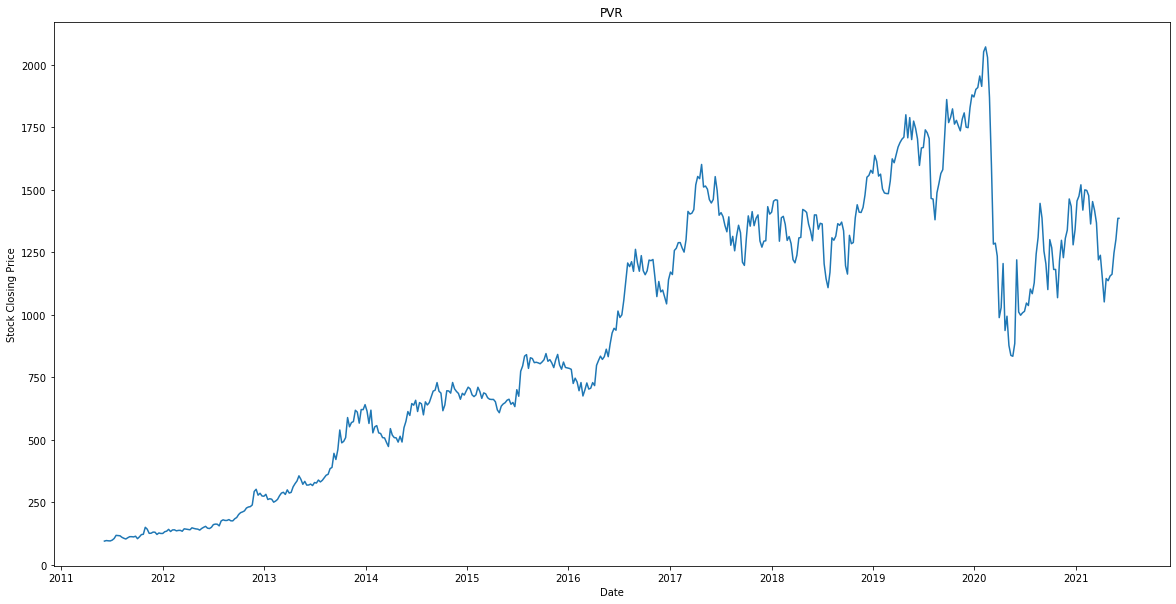

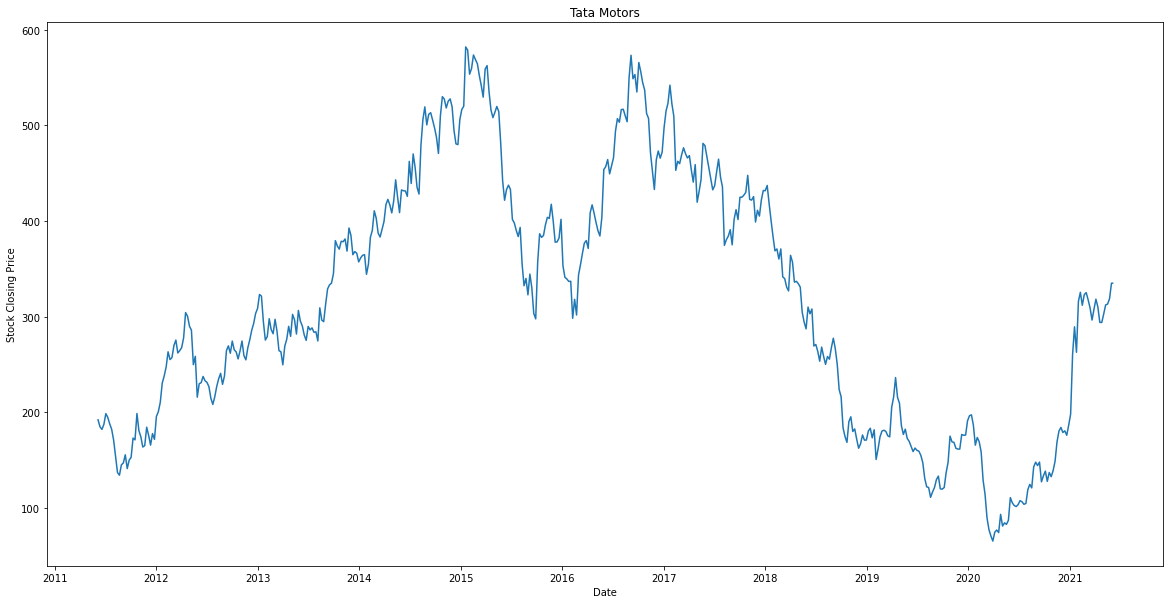

In [3]:
for stock in stocks:
    
    stock['Date'] = pd.to_datetime(stock.Date,format='%Y-%m-%d')
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)

#     plt.scatter(stock['Date'], stock['Adj Close']) # To visualize individual points
    plt.plot(stock['Date'], stock['Adj Close'])
    
    plt.title(stock.name)
    plt.ylabel('Stock Closing Price')
    plt.xlabel('Date')
    plt.show()

In [4]:
for stock in stocks:
    
    stock['HL'] = stock['High'] - stock['Low']
    stock['OC'] = stock['Open'] - stock['Close']
    stock['7MA'] = stock.iloc[:, 5].rolling(window=7).mean()
    stock['14MA'] = stock.iloc[:, 5].rolling(window=14).mean()
    stock['21MA'] = stock.iloc[:, 5].rolling(window=21).mean()
    stock['7SD'] = stock.iloc[:, 5].rolling(window=7).std()

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'HL', 'OC', '7MA', '14MA', '21MA', '7SD']
predict = 'Adj Close'

train_hdfc = hdfc[20:422]
test_hdfc = hdfc[422:]
test_hdfc.name = hdfc.name

train_pvr = pvr[20:422]
test_pvr = pvr[422:]
test_pvr.name = pvr.name

train_tata_motors = tata_motors[20:422]
test_tata_motors = tata_motors[422:]
test_tata_motors.name = tata_motors.name

train_test = [[train_hdfc, test_hdfc], [train_pvr, test_pvr], [train_tata_motors, test_tata_motors]]

### Lasso Regression

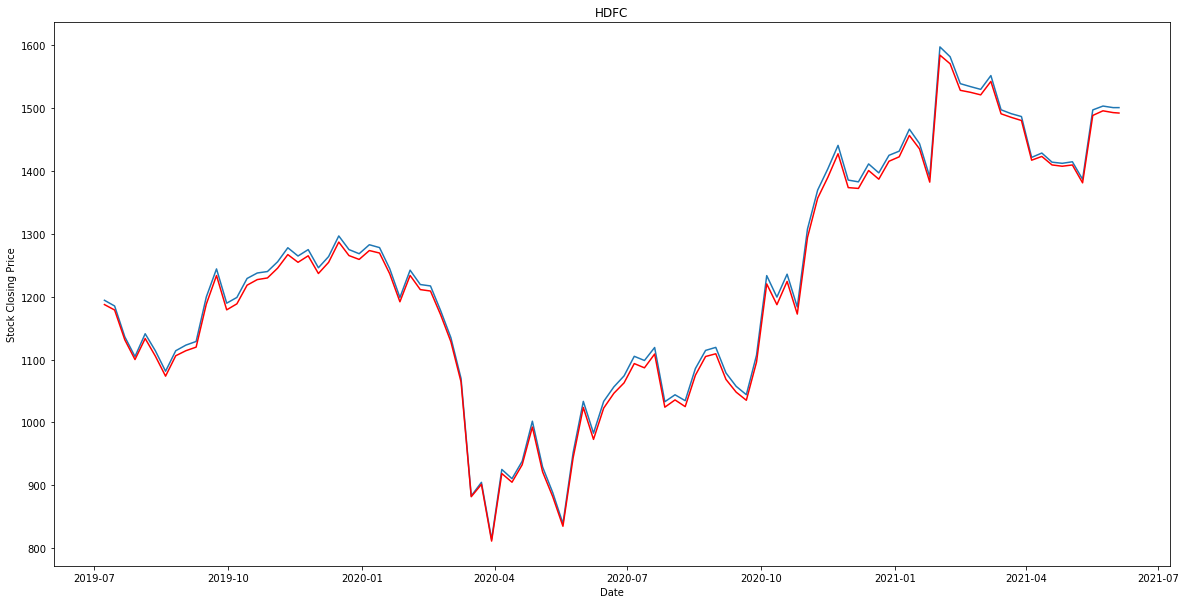

HDFC R2 Score - 0.9976708530921753


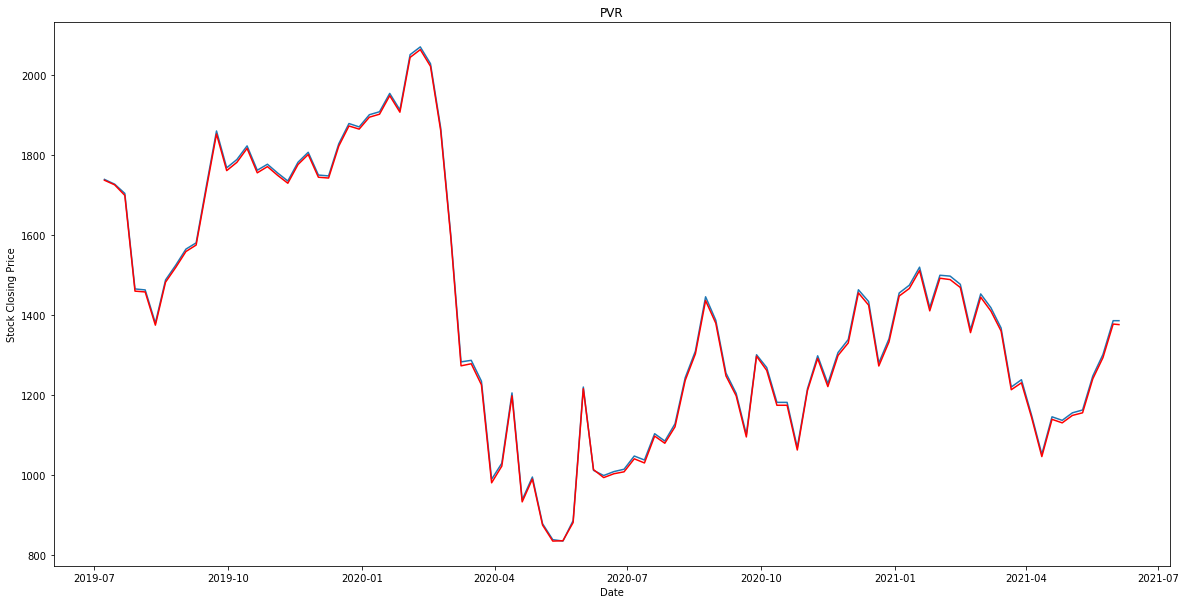

PVR R2 Score - 0.9995374752228124


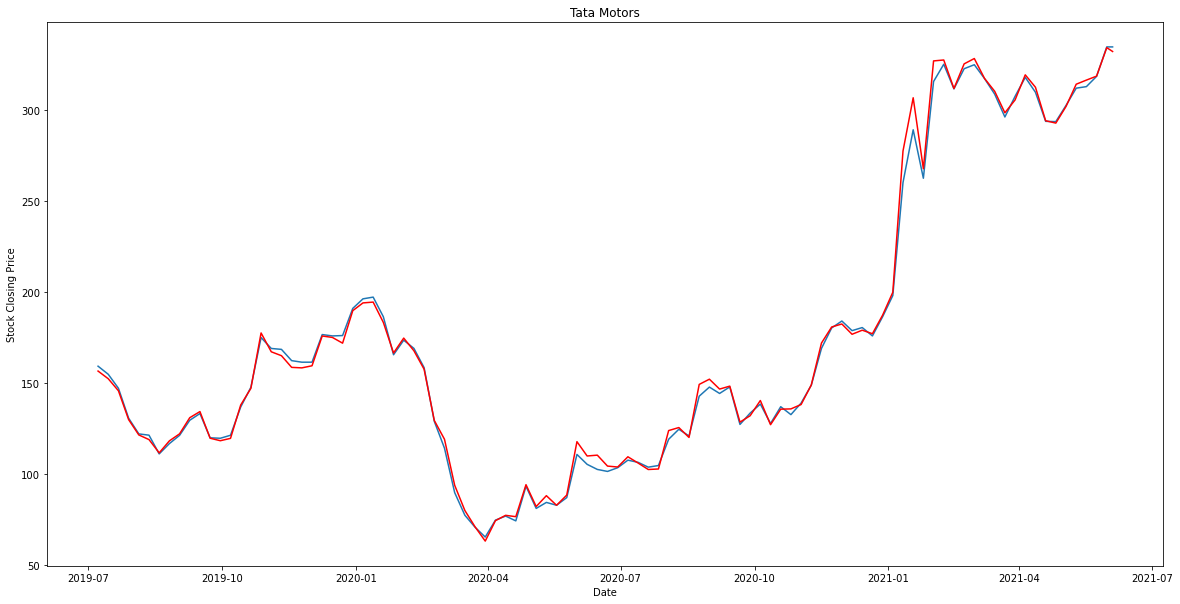

Tata Motors R2 Score - 0.9978511449522184


In [5]:
from sklearn import linear_model


for train, test in train_test:
    model = linear_model.Lasso(alpha=0.1, max_iter=2000)
    model.fit(train[features], train[predict].astype('int'))

    prediction = model.predict(test[features])
    
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)


#     plt.scatter(test['Date'], test['Adj Close'])  # To visualize individual points
    plt.plot(test['Date'], test['Adj Close'])

#     plt.scatter(test['Date'], prediction, color='r')  # To visualize individual points
    plt.plot(test['Date'], prediction, color='r')

    plt.title(test.name)
    plt.ylabel('Stock Closing Price')
    plt.xlabel('Date')
    plt.show()
    print(test.name + ' R2 Score - ' + str(r2_score(test[predict], prediction)))

### Ridge Regression

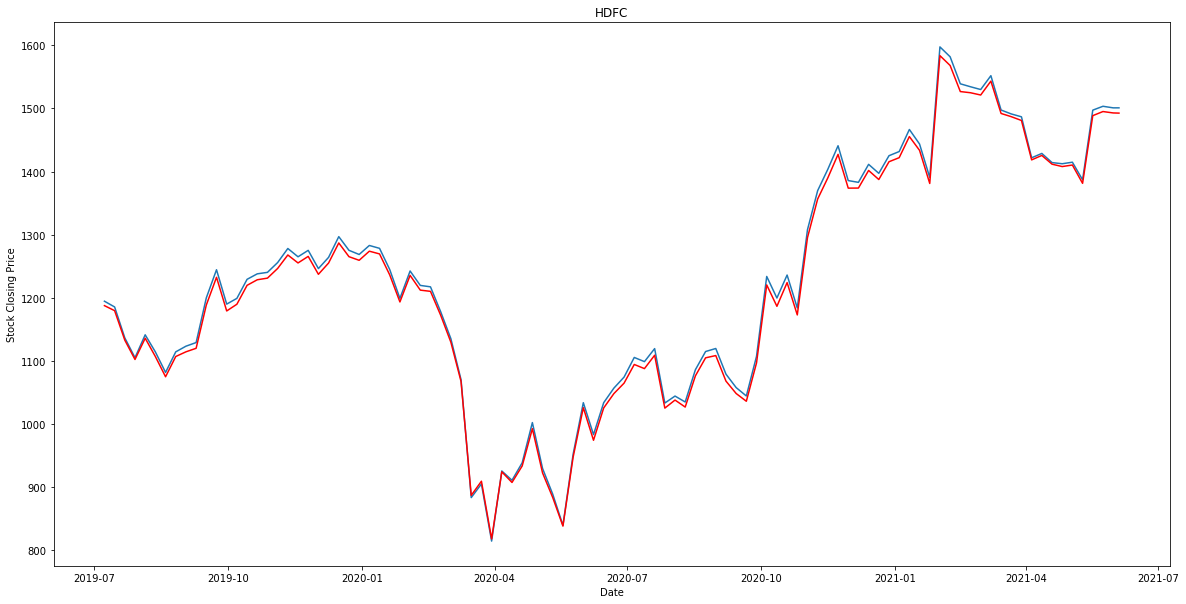

HDFC R2 Score - 0.9978065414930399


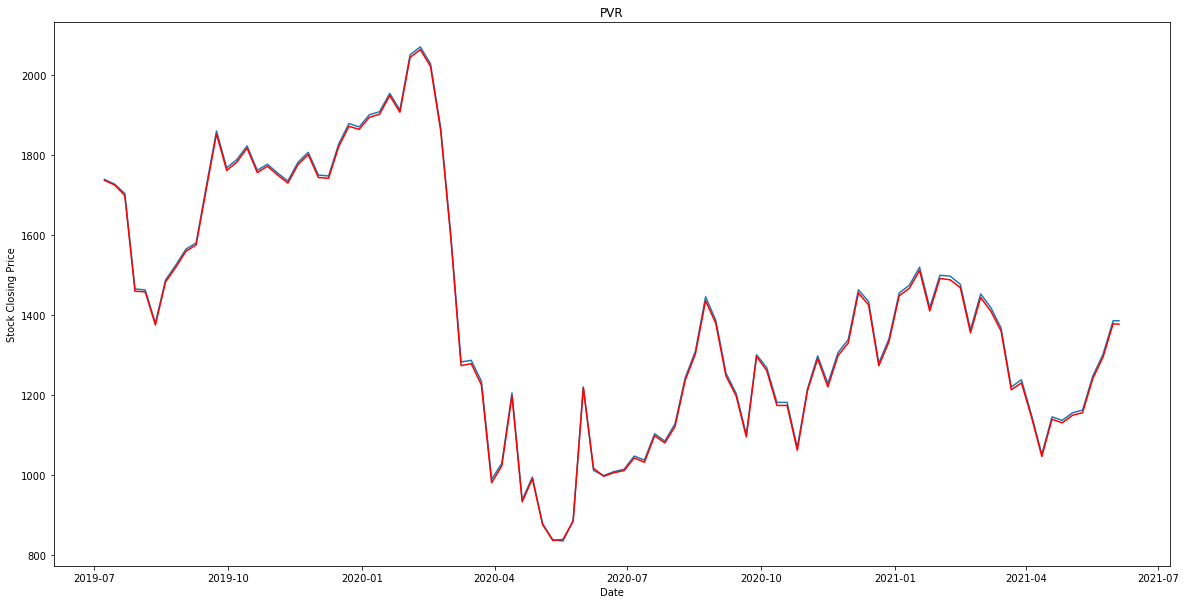

PVR R2 Score - 0.999561352247183


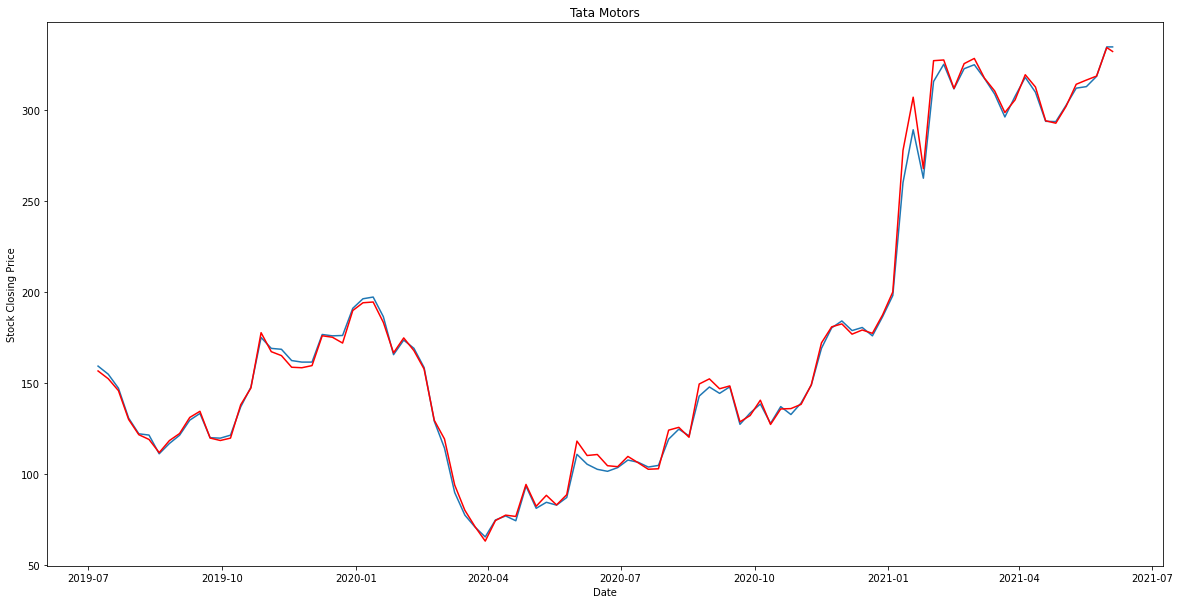

Tata Motors R2 Score - 0.997765120224134


In [6]:
from sklearn.linear_model import Ridge


for train, test in train_test:
    model = Ridge(alpha=1)
    model.fit(train[features], train[predict].astype('int'))

    prediction = model.predict(test[features])
    
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)


#     plt.scatter(test['Date'], test['Adj Close'])  # To visualize individual points
    plt.plot(test['Date'], test['Adj Close'])

#     plt.scatter(test['Date'], prediction, color='r')  # To visualize individual points
    plt.plot(test['Date'], prediction, color='r')

    plt.title(test.name)
    plt.ylabel('Stock Closing Price')
    plt.xlabel('Date')
    plt.show()
    print(test.name + ' R2 Score - ' + str(r2_score(test[predict], prediction)))

### Bayesian Ridge

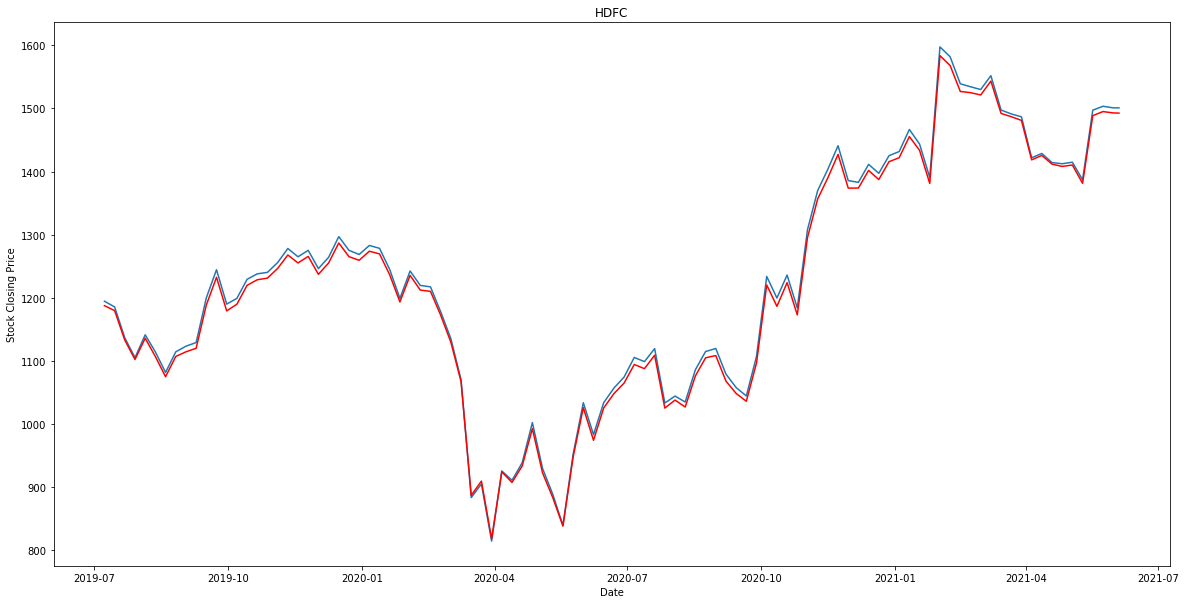

HDFC R2 Score - 0.9978094380177152


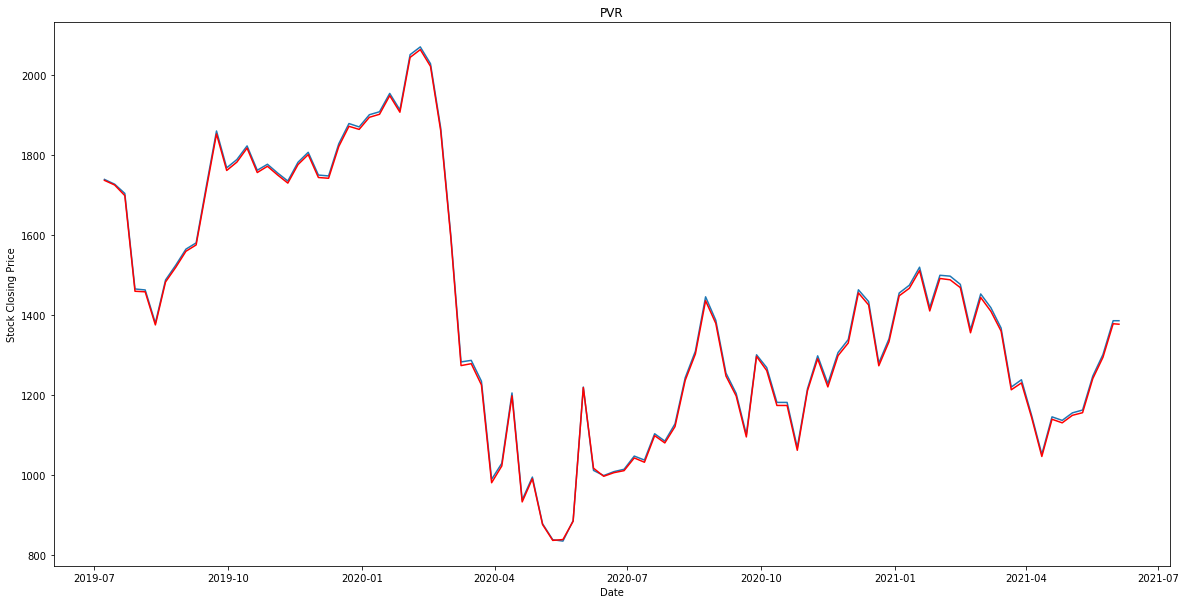

PVR R2 Score - 0.9995615198013891


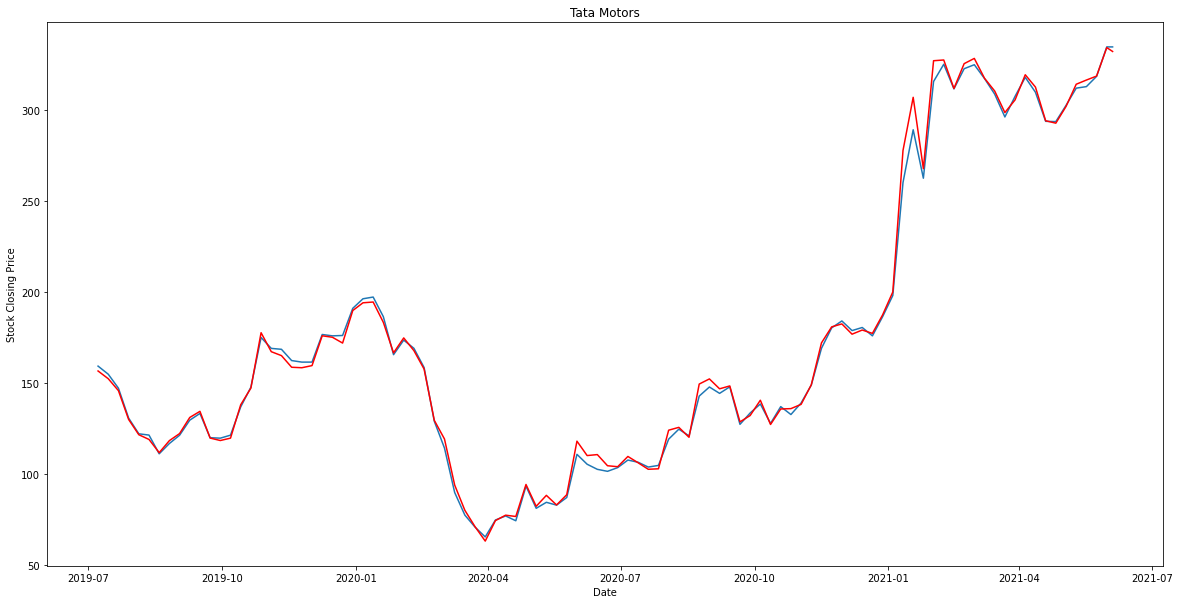

Tata Motors R2 Score - 0.9977794291117504


In [7]:
from sklearn.linear_model import BayesianRidge

for train, test in train_test:
    model = BayesianRidge()
    model.fit(train[features], train[predict].astype('int'))

    prediction = model.predict(test[features])
    
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)


#     plt.scatter(test['Date'], test['Adj Close'])  # To visualize individual points
    plt.plot(test['Date'], test['Adj Close'])

#     plt.scatter(test['Date'], prediction, color='r')  # To visualize individual points
    plt.plot(test['Date'], prediction, color='r')

    plt.title(test.name)
    plt.ylabel('Stock Closing Price')
    plt.xlabel('Date')
    plt.show()
    print(test.name + ' R2 Score - ' + str(r2_score(test[predict], prediction)))

### Kernel Ridge

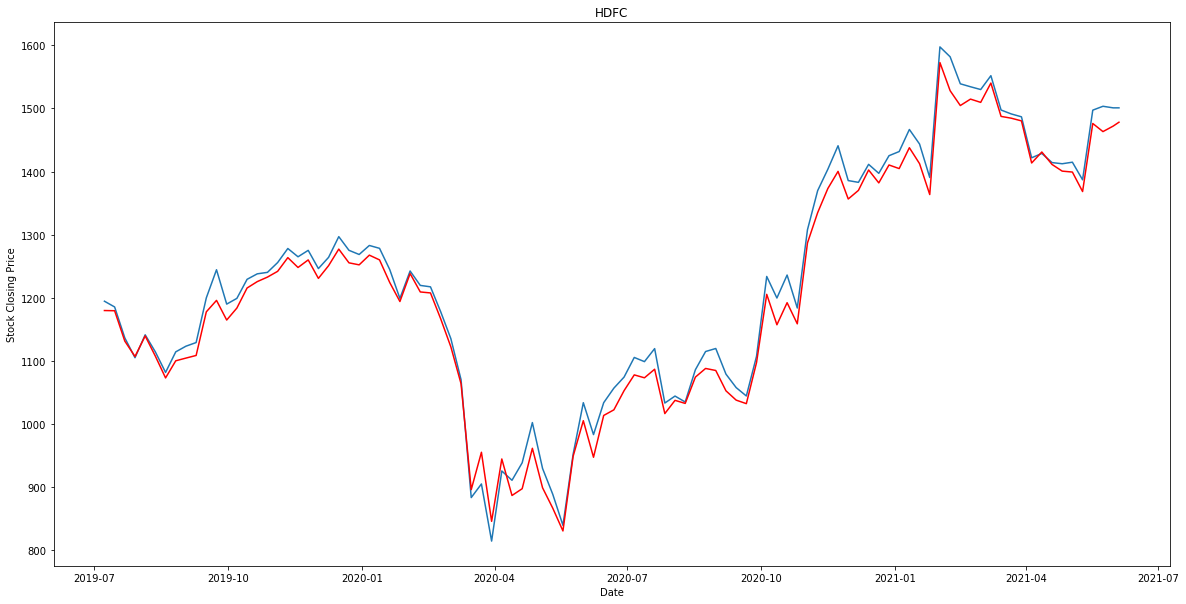

HDFC R2 Score - 0.9850931047409803


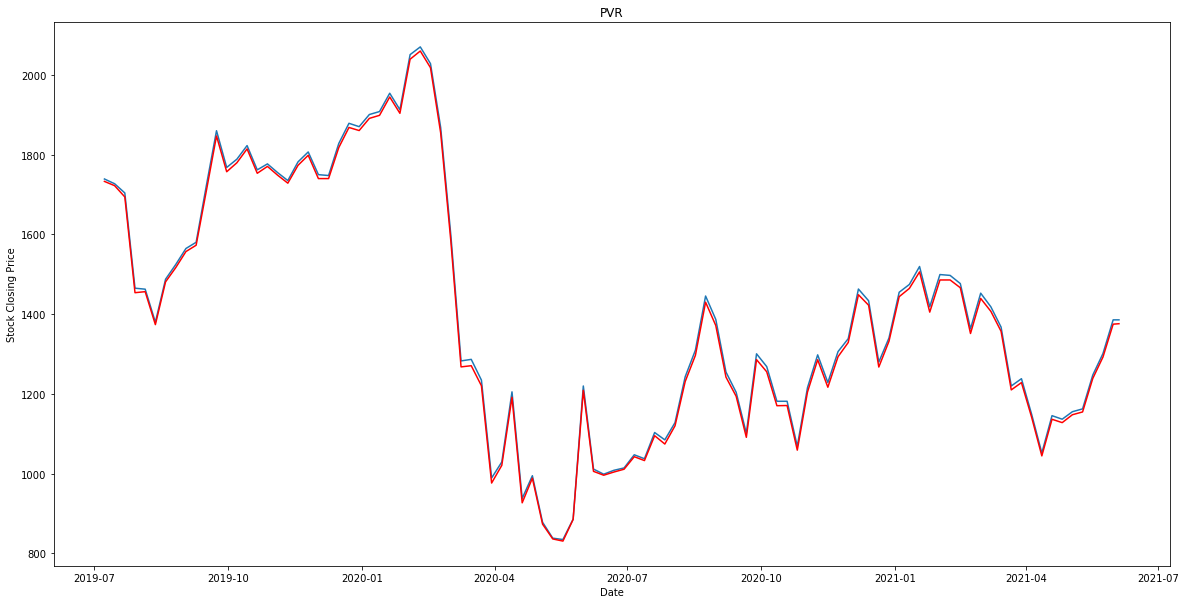

PVR R2 Score - 0.9989261352778397


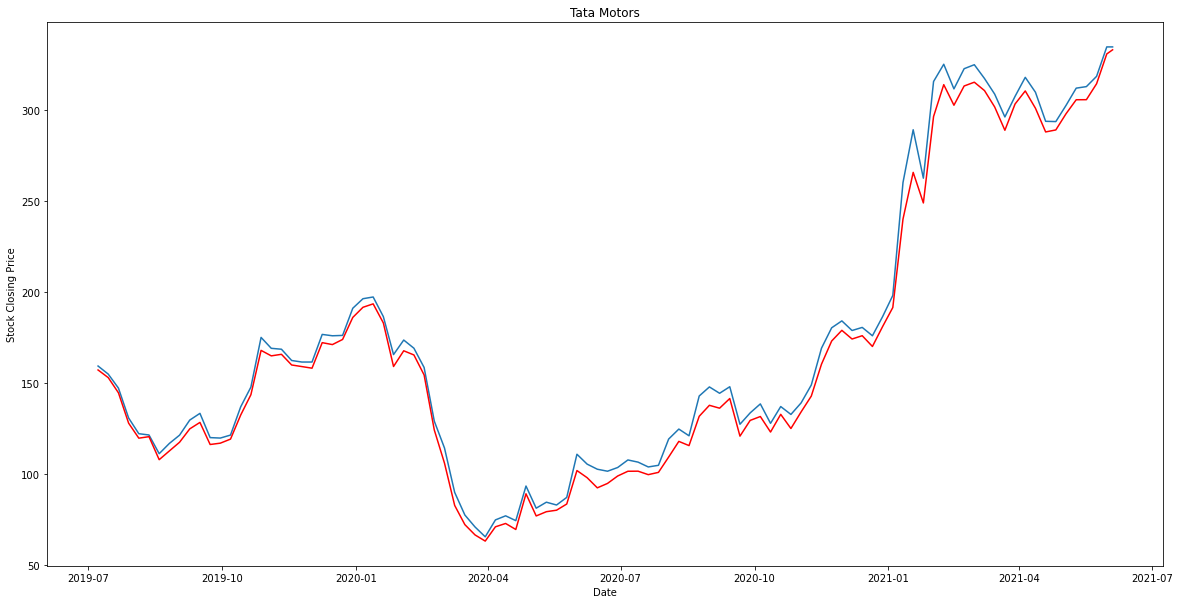

Tata Motors R2 Score - 0.992313539134383


In [8]:
from sklearn.kernel_ridge import KernelRidge

for train, test in train_test:
    model = KernelRidge()
    model.fit(train[features], train[predict].astype('int'))

    prediction = model.predict(test[features])
    
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)


#     plt.scatter(test['Date'], test['Adj Close'])  # To visualize individual points
    plt.plot(test['Date'], test['Adj Close'])

#     plt.scatter(test['Date'], prediction, color='r')  # To visualize individual points
    plt.plot(test['Date'], prediction, color='r')

    plt.title(test.name)
    plt.ylabel('Stock Closing Price')
    plt.xlabel('Date')
    plt.show()
    print(test.name + ' R2 Score - ' + str(r2_score(test[predict], prediction)))

### Stochastic Gradient Descent

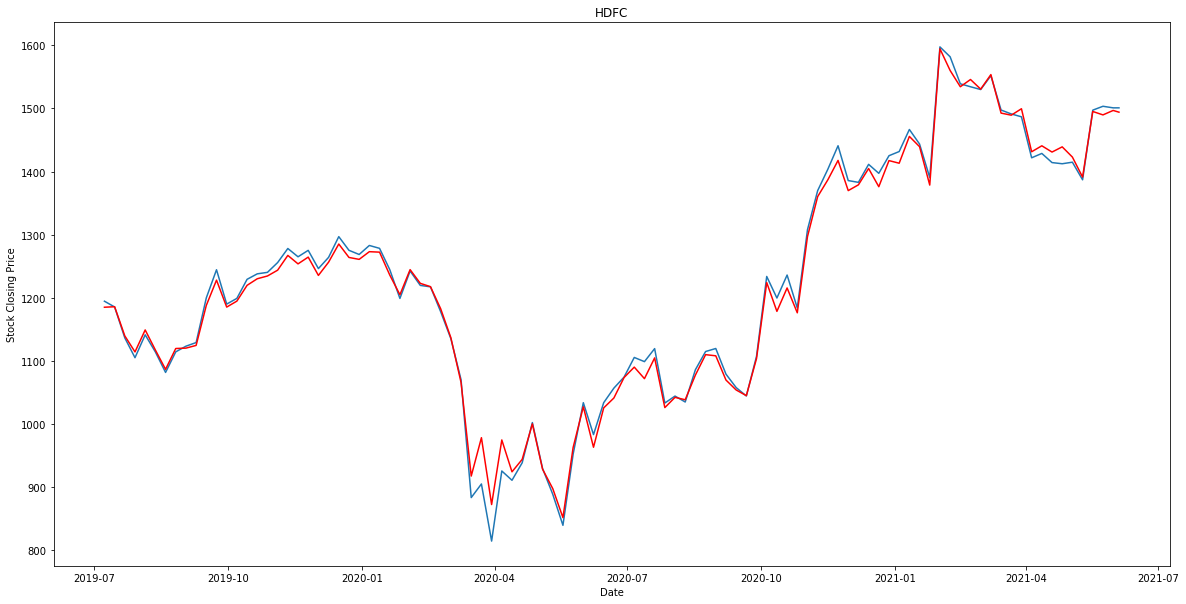

HDFC R2 Score - 0.9934842184501657


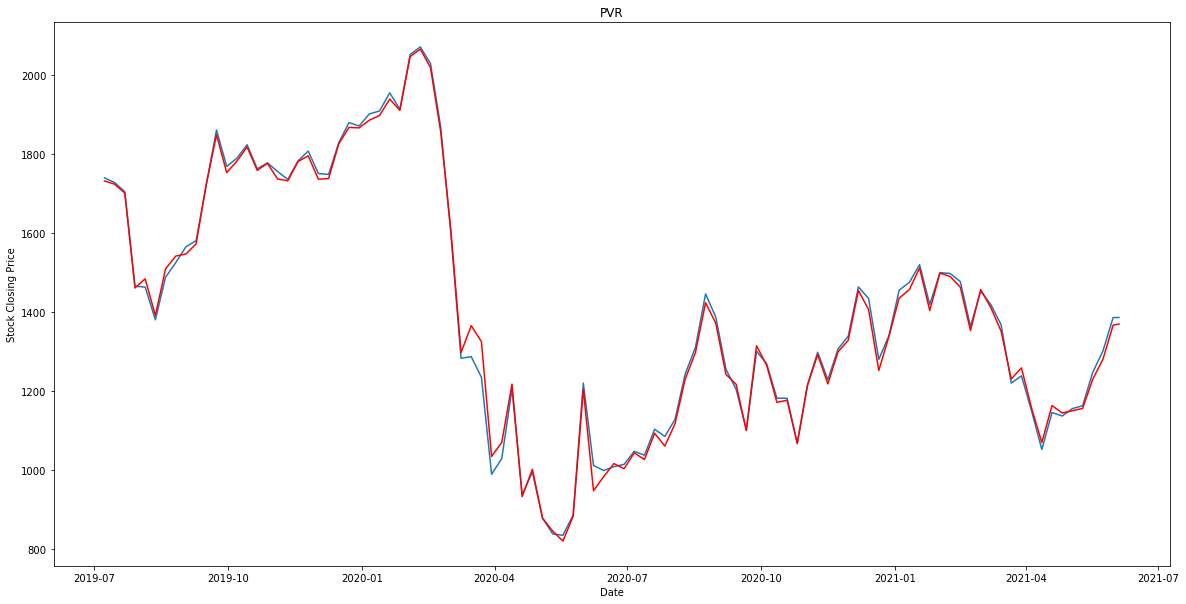

PVR R2 Score - 0.9961981048926728


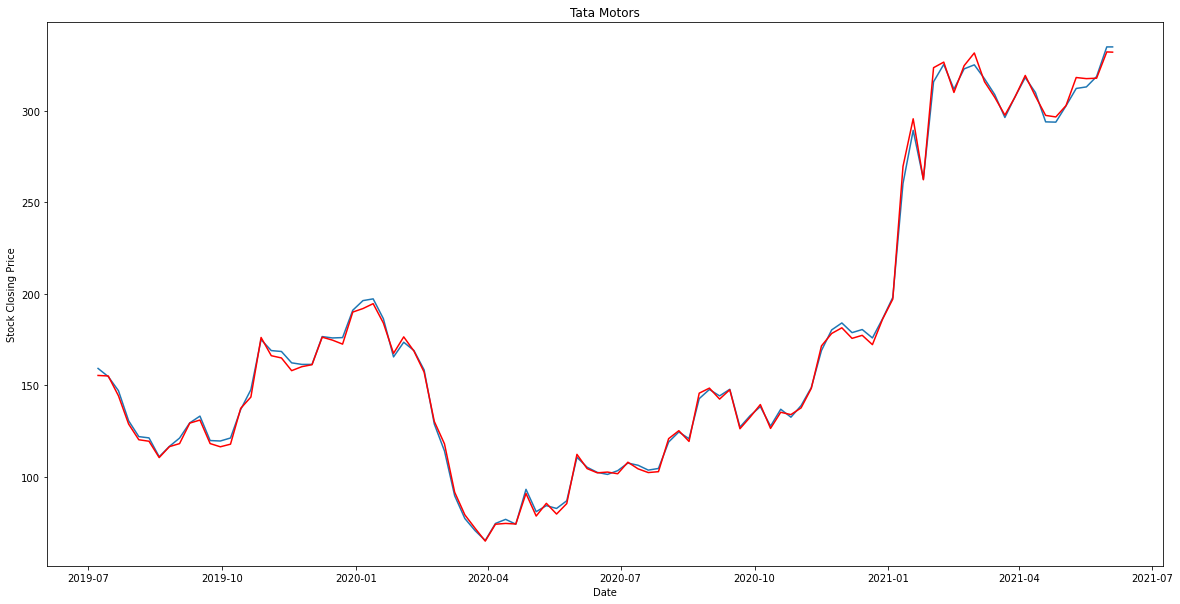

Tata Motors R2 Score - 0.9988949167800812


In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

for train, test in train_test:
    model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
    model.fit(train[features], train[predict].astype('int'))

    prediction = model.predict(test[features])
    
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)


#     plt.scatter(test['Date'], test['Adj Close'])  # To visualize individual points
    plt.plot(test['Date'], test['Adj Close'])

#     plt.scatter(test['Date'], prediction, color='r')  # To visualize individual points
    plt.plot(test['Date'], prediction, color='r')

    plt.title(test.name)
    plt.ylabel('Stock Closing Price')
    plt.xlabel('Date')
    plt.show()
    print(test.name + ' R2 Score - ' + str(r2_score(test[predict], prediction)))

### Random Forests

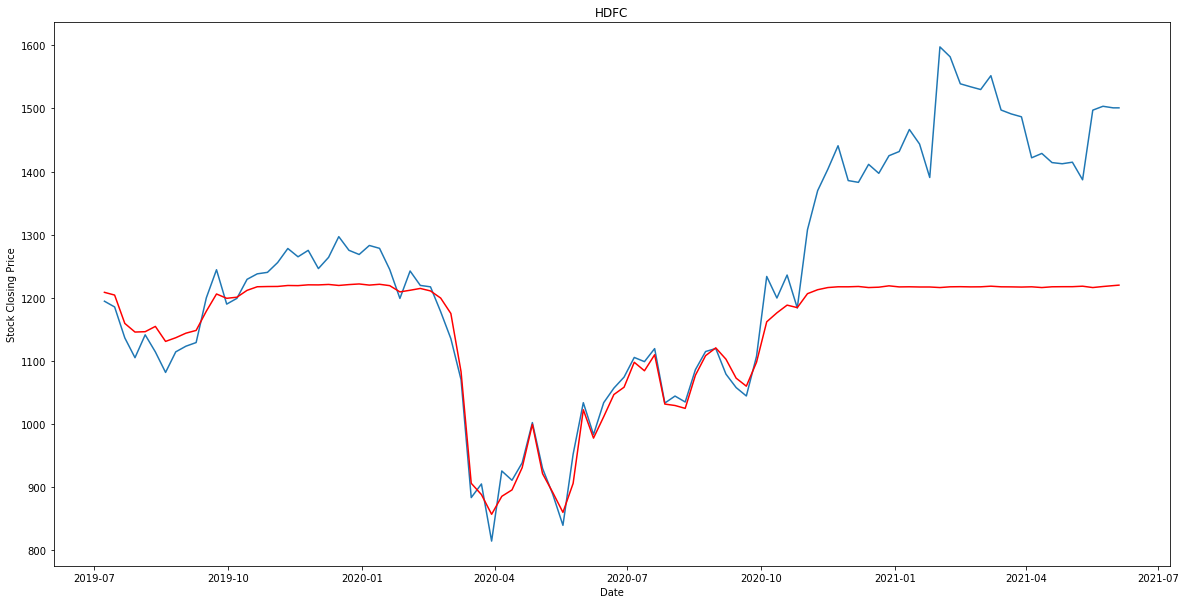

HDFC R2 Score - 0.440390748362106


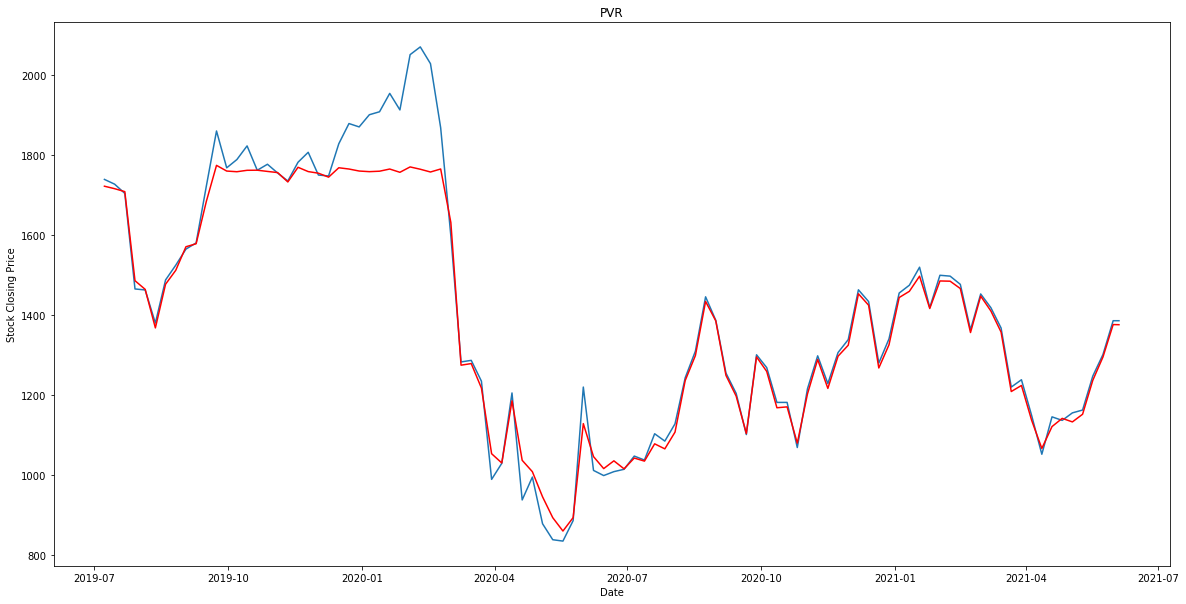

PVR R2 Score - 0.9538944978881849


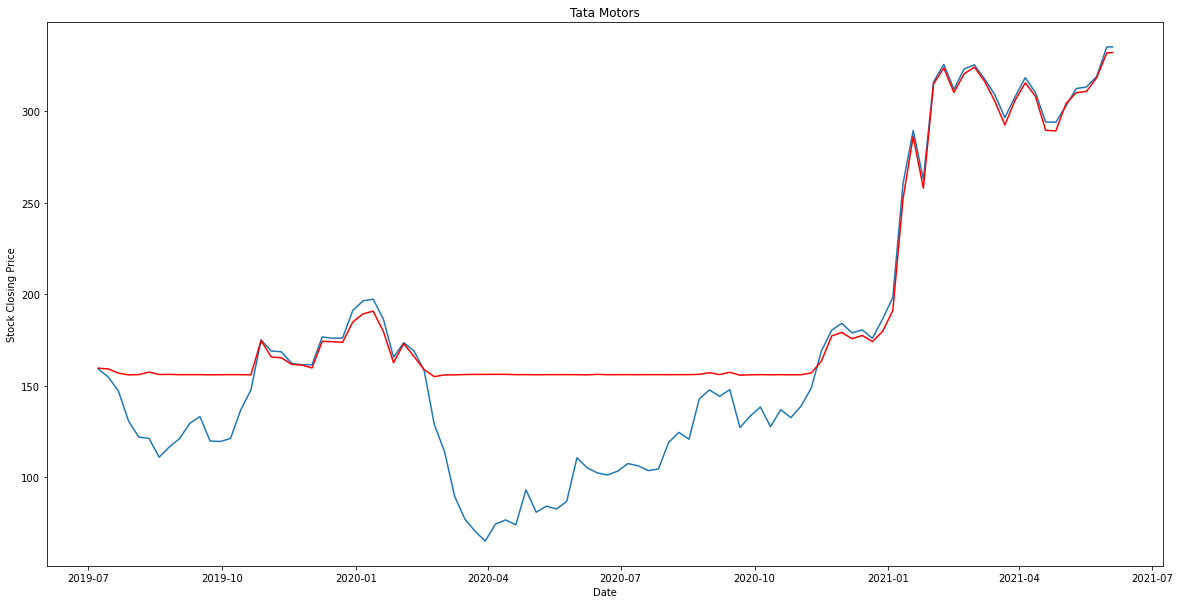

Tata Motors R2 Score - 0.8081456251882622


In [10]:
from sklearn.ensemble import RandomForestRegressor


for train, test in train_test:    
    model = RandomForestRegressor()
    model.fit(train[features], train[predict].astype('int'))

    prediction = model.predict(test[features])
    
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)


#     plt.scatter(test['Date'], test['Adj Close'])  # To visualize individual points
    plt.plot(test['Date'], test['Adj Close'])

#     plt.scatter(test['Date'], prediction, color='r')  # To visualize individual points
    plt.plot(test['Date'], prediction, color='r')

    plt.title(test.name)
    plt.ylabel('Stock Closing Price')
    plt.xlabel('Date')
    plt.show()
    print(test.name + ' R2 Score - ' + str(r2_score(test[predict], prediction)))